# **Modelos de Regresión**

### **Librerias:**

In [ ]:
# Importing PolynomialFeatures for generating polynomial and interaction features
# Importing RepeatedKFold for repeated cross-validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression
# importinng linear_model for linear regression


from sklearn.svm import SVR
# Importing SVR for Support Vector Regression

from sklearn.neighbors import KNeighborsRegressor
# Importing KNeighborsRegressor for k-nearest neighbors regression

# Importing pandas for data manipulation and analysis
import pandas as pd

import seaborn as sns
# Importing seaborn for data visualization

# Importing matplotlib.pyplot for creating visualizations
import matplotlib.pyplot as plt

# Importing time module for measuring execution time
import time

from sklearn.model_selection import cross_val_score
# Importing cross_val_score for cross-validation scoring

# Importing train_test_split for splitting data into training and testing sets
# Importing GridSearchCV for hyperparameter tuning using grid search
from sklearn.model_selection import train_test_split, GridSearchCV

# Importing Pipeline for creating machine learning pipelines
from sklearn.pipeline import Pipeline

# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Importing Ridge and Lasso for linear regression with regularization
from sklearn.linear_model import Ridge, Lasso

# Importing RandomForestRegressor for ensemble-based regression
from sklearn.ensemble import RandomForestRegressor

# Importing XGBRegressor from XGBoost for gradient boosting regression
from xgboost import XGBRegressor

# Importing metrics for evaluating regression models
# r2_score: Coefficient of determination
# mean_squared_error: Mean squared error
# mean_absolute_error: Mean absolute error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load the dataset from the specified file path
# Ensure the file path is correct and accessible
# Use relative paths cautiously to avoid issues when sharing or moving the notebook
df = pd.read_csv('..\df_final.csv')  # Load the dataset


## **Caso problema: Evaluación del potencial de energía Solar en Barranquilla: Análisis de irradiancia y variables atmosféricas para la generación sostenible**

### **Contextualización**

El creciente interés por las fuentes de energía limpias y renovables ha generado una demanda creciente en el uso de recursos solares, tanto en entornos urbanos como en zonas costeras. **Barranquilla**, ubicada geográficamente en el Caribe colombiano, se beneficia de una alta exposición a la radiación solar durante la mayor parte del año, lo que representa una gran oportunidad para el desarrollo de proyectos de generación fotovoltaica.

Sin embargo, la capacidad de aprovechamiento de la energía solar no depende únicamente de la radiación solar incidente, sino también de varios **factores atmosféricos** como la temperatura, la humedad, la nubosidad, el viento y la presión, los cuales influyen directamente en la eficiencia de los sistemas solares.

Este trabajo presenta un **análisis cuantitativo del potencial de generación solar en Barranquilla**, a partir del uso de datos históricos de irradiancia difusa, índice UV y variables meteorológicas recopiladas entre los años 2020 y 2025. El objetivo es construir un **modelo de regresión** que permita predecir un índice compuesto denominado `SolarIndex`, el cual representa una estimación del potencial energético solar considerando múltiples condiciones atmosféricas simultáneamente.

La modelización de este índice permitirá identificar **zonas y periodos del año con mayor rendimiento potencial**, sirviendo como insumo para la planificación energética, la ubicación estratégica de sistemas fotovoltaicos y el diseño de **políticas públicas sostenibles**.

In [3]:
# === Definition of predictor variables and target variable for regression model ===

# List of independent variables (features) used to estimate solar potential
feature_cols = [
    'T2M',       # Temperature at 2 meters
    'RH2M',      # Relative humidity at 2 meters
    'WS10M',     # Wind speed at 10 meters
    'WD10M',     # Wind direction at 10 meters
    'PS',        # Surface pressure
    'T2MDEW',    # Dew point temperature at 2 meters
    'T2MWET',    # Wet bulb temperature
    'WS50M'      # Wind speed at 50 meters
]

# Define predictor variables (X) and target variable (y)
# - X: DataFrame containing the selected feature columns
# - y: Series containing the target variable 'SolarIndex'
X = df[feature_cols]  # Extract features from the dataset
y = df['SolarIndex']  # Extract the target variable




### **Modelos para el caso de regresión y Benchmark**

In [4]:
# === Split the dataset into training and testing sets ===
# - X_train, X_test: Predictor variables for training and testing
# - y_train, y_test: Target variable for training and testing
# - test_size=0.2: 20% of the data is allocated for testing
# - random_state=42: Ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [5]:
# === Initialize a dictionary to store model results ===
# This dictionary will hold performance metrics for each model
# Metrics such as R², MSE, MAE, and training time will be stored for comparison
model_results = {}

### **KNN**

In [ ]:
# === K-Nearest Neighbors (KNN) Regression ===

# Create a pipeline for KNN regression:
# - Step 1: StandardScaler for feature scaling (mean=0, variance=1)
# - Step 2: KNeighborsRegressor with n_neighbors=5 (default value, can be adjusted)
knn_model = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features to improve model performance
    ('model', KNeighborsRegressor(n_neighbors=5))  # KNN regression model
])

# === Model Training and Timing ===
# Measure the time taken to train the KNN model
start_time = time.time()  # Record the start time
knn_model.fit(X_train, y_train)  # Train the KNN model using the training dataset
end_time = time.time()  # Record the end time

# Calculate the total training time in seconds
knn_training_time = end_time - start_time  # Compute the elapsed training time

# === Prediction and Evaluation ===
# Predict the target variable for the test dataset
# - X_test: Predictor variables for testing
# - y_pred_knn: Predicted values for the test set
y_pred_knn = knn_model.predict(X_test)  # Generate predictions using the trained model

#### **Evaluación** 

In [ ]:
# === Store KNN Model Results ===
# Add the evaluation metrics for the KNN model to the `model_results` dictionary
# - 'R2': Coefficient of determination, measures the goodness of fit of the model
# - 'MSE': Mean Squared Error, measures the average squared difference between actual and predicted values
# - 'MAE': Mean Absolute Error, measures the average absolute difference between actual and predicted values
# - 'Training Time (s)': Total training time in seconds, rounded to 2 decimal places
model_results['KNN'] = {
    'R2': r2_score(y_test, y_pred_knn),  # Calculate R² score for the test set
    'MSE': mean_squared_error(y_test, y_pred_knn),  # Calculate Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_knn),  # Calculate Mean Absolute Error
    'Training Time (s)': round(knn_training_time, 2)  # Record training time rounded to 2 decimals
}

# === Print KNN Model Results ===
# Display the evaluation metrics for the KNN model in a clear and structured format
print("KNN Results:")
print("R2:", model_results['KNN']['R2'])  # Display R² score
print("MSE:", model_results['KNN']['MSE'])  # Display Mean Squared Error
print("MAE:", model_results['KNN']['MAE'])  # Display Mean Absolute Error
print("Training Time (s):", model_results['KNN']['Training Time (s)'])  # Display training time

KNN Results:
R2: 0.9999273186688901
MSE: 1.2585006654533117e-07
MAE: 8.691024951373174e-06
Training Time (s): 3.8


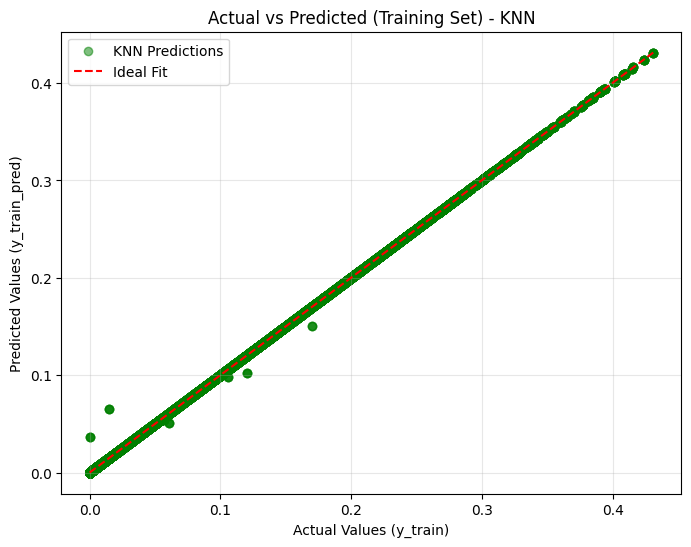

In [ ]:
# === Predicted values for the training set using the KNN model ===
# Generate predictions for the training set using the trained KNN model
# - y_train: Actual target values for the training set
# - y_train_pred_knn: Predicted target values for the training set
y_train_pred_knn = knn_model.predict(X_train)

# === Plotting actual vs predicted values for the training set ===
# Create a scatter plot to visualize the relationship between actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_knn, alpha=0.5, color='green', label='KNN Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference
plt.title('Actual vs Predicted (Training Set) - KNN')  # Add a title to the plot
plt.xlabel('Actual Values (y_train)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_train_pred)')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization
plt.show()  # Display the plot


#### **Análisis del modelo**

El modelo de regresión KNN fue entrenado sin ajuste de hiperparámetros explícito, utilizando un valor predeterminado para `n_neighbors`. A pesar de su simplicidad, mostró un desempeño sobresaliente.

- **R²:** 0.9999  
- **MSE:** 1.26e-07  
- **MAE:** 8.69e-06  
- **Tiempo de entrenamiento:** 3.8 segundos

##### **Interpretación de Resultados Numéricos**

- **R² (0.9999)** indica que el modelo explica **más del 99.99% de la variabilidad** del `SolarIndex`, lo que sugiere un ajuste casi perfecto en los datos de entrenamiento.
  
- **MSE y MAE extremadamente bajos**, lo cual implica que el error promedio entre las predicciones y los valores reales es prácticamente insignificante.

- **Tiempo de entrenamiento razonablemente bajo**, lo que hace que KNN sea competitivo incluso sin ser el más rápido.

##### **Análisis Visual (Actual vs Predicted)**

La gráfica muestra los puntos de predicción **alineados casi perfectamente sobre la línea ideal (roja discontinua)**. Esto indica que:

- Las predicciones son **altamente precisas** y siguen de cerca los valores reales.
- No hay evidencia de dispersión, subestimación ni sobreajuste visible en los datos de entrenamiento.

##### **Conclusión**

KNN demostró ser **uno de los modelos más precisos**, aunque este rendimiento excepcional podría deberse a **overfitting en los datos de entrenamiento**. Dado que KNN memoriza los datos sin generar una función explícita, su generalización debe ser validada cuidadosamente en datos no vistos. A pesar de esto, el modelo es:

- **Altamente preciso**, ideal como benchmark de referencia.
- **Sensible a ruido y a la dimensionalidad**, por lo que podría beneficiarse de técnicas de reducción de dimensiones o validación cruzada.

---

### **Lineal Regression**

In [ ]:
# === Linear Regression Model ===

# Create a pipeline for Linear Regression:
# - Step 1: StandardScaler for feature scaling (mean=0, variance=1)
# - Step 2: LinearRegression as the regression model
linear_model = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('model', LinearRegression())  # Linear regression model
])

# === Model Training and Timing ===

# Start the timer to measure training time
start_time = time.time()  # Record the start time

# Train the Linear Regression model using the training dataset
# - X_train: Predictor variables for training
# - y_train: Target variable for training
linear_model.fit(X_train, y_train)

# Stop the timer after training is complete
end_time = time.time()  # Record the end time

# === Prediction and Evaluation ===

# Predict the target variable for the test dataset
# - X_test: Predictor variables for testing
# - y_pred_linear: Predicted values for the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate the total training time in seconds
linear_training_time = end_time - start_time  # Compute the elapsed training time


#### **Evalución** 

In [ ]:
# === Store Linear Regression Results ===
# Add the evaluation metrics for the Linear Regression model to the `model_results` dictionary
# - 'R2': Coefficient of determination, measures the goodness of fit of the model
# - 'MSE': Mean Squared Error, measures the average squared difference between actual and predicted values
# - 'MAE': Mean Absolute Error, measures the average absolute difference between actual and predicted values
# - 'Training Time (s)': Total training time in seconds, rounded to 2 decimal places
model_results['Linear Regression'] = {
    'R2': r2_score(y_test, y_pred_linear),  # Calculate R² score for the test set
    'MSE': mean_squared_error(y_test, y_pred_linear),  # Calculate Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_linear),  # Calculate Mean Absolute Error
    'Training Time (s)': round(linear_training_time, 2)  # Record training time rounded to 2 decimals
}

# === Print Linear Regression Results ===
# Display the evaluation metrics for the Linear Regression model in a clear and structured format
print("Linear Regression Results:")
print("R2:", model_results['Linear Regression']['R2'])  # Display R² score
print("MSE:", model_results['Linear Regression']['MSE'])  # Display Mean Squared Error
print("MAE:", model_results['Linear Regression']['MAE'])  # Display Mean Absolute Error
print("Training Time (s):", model_results['Linear Regression']['Training Time (s)'])  # Display training time

Linear Regression Results:
R2: 0.25551271137630516
MSE: 0.0012891037269770042
MAE: 0.022109450944480396
Training Time (s): 0.36


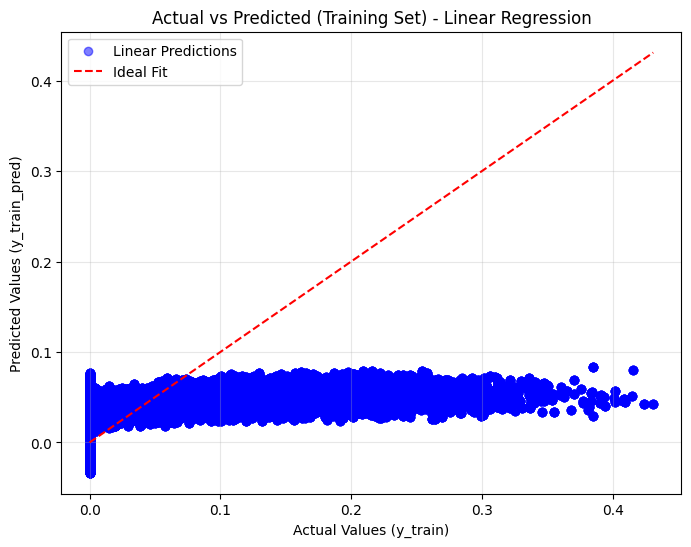

In [ ]:
# === Predicted values for the training set using the Linear Regression model ===
# Generate predictions for the training set using the trained Linear Regression model
y_train_pred_linear = linear_model.predict(X_train)

# === Plotting actual vs predicted values for the training set ===
# Create a scatter plot to visualize the relationship between actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_linear, alpha=0.5, color='blue', label='Linear Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference
plt.title('Actual vs Predicted (Training Set) - Linear Regression')  # Add a title to the plot
plt.xlabel('Actual Values (y_train)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_train_pred)')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization
plt.show()  # Display the plot


#### **Análisis del modelo**

El modelo de regresión lineal fue entrenado sin regularización y evaluado utilizando el conjunto de prueba. Sus métricas de desempeño son las siguientes:

- **R²:** 0.2555  
- **MSE:** 0.00129  
- **MAE:** 0.0221  
- **Tiempo de entrenamiento:** 0.36 segundos

##### **Interpretación de Resultados Numéricos**

- **R² (0.2555)** indica que el modelo explica aproximadamente el **25.5% de la variabilidad** del `SolarIndex`, exactamente igual al modelo Ridge con regularización, lo cual es consistente dado que Ridge con un alpha bajo se comporta como una regresión lineal estándar.
  
- **MSE (0.00129)** y **MAE (0.0221)** muestran errores bajos, pero comparables a otros modelos de baja complejidad, lo que sugiere **limitaciones para capturar relaciones no lineales complejas**.

- El **tiempo de entrenamiento** fue extremadamente eficiente (**0.36 segundos**), destacando la simplicidad computacional del modelo.

##### **Análisis Visual (Actual vs Predicted)**

La gráfica `Actual vs Predicted` muestra un patrón disperso, con predicciones azules concentradas cerca de un rango estrecho, por debajo de la línea de ajuste ideal (roja discontinua). Esto revela que:

- El modelo **no logra capturar la varianza real** de los datos en los extremos del `SolarIndex`.
- Tiende a **subestimar los valores altos** y **sobreestimar los bajos**, indicando una falta de capacidad para adaptarse a complejidades no lineales en los datos.

##### **Conclusión**

- La regresión lineal es útil como **modelo base simple**, rápido de ejecutar y fácil de interpretar.
- Sin embargo, su bajo R² y la forma de la gráfica de predicciones sugieren que no es adecuado para capturar **patrones no lineales o interacciones complejas** en los datos.
- **Modelos más avanzados como XGBoost o Random Forest** deben considerarse si se desea mejorar significativamente el desempeño predictivo.

---

### **SVM Regressor**

In [ ]:
# === Support Vector Regression (SVR) ===

# Create a pipeline that includes:
# - StandardScaler: Standardizes the predictor variables to have mean=0 and variance=1
# - SVR: Support Vector Regression model with RBF kernel (default kernel, can be changed if needed)
svm_model = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Feature scaling for normalization
    ('model', SVR(kernel='rbf'))  # Step 2: SVR model with RBF kernel
])

# === Model Training and Timing ===

# Start the timer to measure training time
start_time = time.time()  # Record the start time

# Train the SVR model using the training dataset
# - X_train: Predictor variables for training
# - y_train: Target variable for training
svm_model.fit(X_train, y_train)

# Stop the timer after training is complete
end_time = time.time()  # Record the end time

# Predict the target variable for the test dataset
# - X_test: Predictor variables for testing
# - y_pred_svm: Predicted values for the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate the total training time in seconds
svm_training_time = end_time - start_time  # Compute the elapsed training time


#### **Evalución** 

In [ ]:
# === Store SVR Model Results ===
# Add the evaluation metrics for the SVR model to the `model_results` dictionary
# - 'R2': Coefficient of determination, measures the goodness of fit of the model
# - 'MSE': Mean Squared Error, measures the average squared difference between actual and predicted values
# - 'MAE': Mean Absolute Error, measures the average absolute difference between actual and predicted values
# - 'Training Time (s)': Total training time in seconds, rounded to 2 decimal places
model_results['SVR'] = {
    'R2': r2_score(y_test, y_pred_svm),  # Calculate R² score for the test set
    'MSE': mean_squared_error(y_test, y_pred_svm),  # Calculate Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_svm),  # Calculate Mean Absolute Error
    'Training Time (s)': round(svm_training_time, 2)  # Record training time rounded to 2 decimals
}

# === Print SVR Model Results ===
# Display the evaluation metrics for the SVR model in a clear and structured format
print("\nSVR Results:")
print("R2:", model_results['SVR']['R2'])  # Display R² score
print("MSE:", model_results['SVR']['MSE'])  # Display Mean Squared Error
print("MAE:", model_results['SVR']['MAE'])  # Display Mean Absolute Error
print("Training Time (s):", model_results['SVR']['Training Time (s)'])  # Display training time

In [ ]:
# === Predicted values for the training set using the SVR model ===
# Generate predictions for the training set using the trained SVR model
y_train_pred_svm = svm_model.predict(X_train)

# === Plotting actual vs predicted values for the training set ===
# Create a scatter plot to visualize the relationship between actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_svm, alpha=0.5, color='purple', label='SVR Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference
plt.title('Actual vs Predicted (Training Set) - SVR')  # Add a title to the plot
plt.xlabel('Actual Values (y_train)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_train_pred)')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization
plt.show()  # Display the plot


#### **Análisis del modelo**

### **Ridge Regression**

In [ ]:
# === Ridge Regression Pipeline Configuration ===

# Create a pipeline that includes:
# - StandardScaler: Standardizes the predictor variables to have mean=0 and variance=1
# - Ridge: Ridge regression model for regularized linear regression
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Feature scaling for normalization
    ('model', Ridge())  # Step 2: Ridge regression model
])

# Define the hyperparameter grid for alpha (regularization strength)
ridge_params = {'model__alpha': [0.01, 0.1, 1, 10, 100]}  # Range of alpha values to test

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
ridge_grid = GridSearchCV(ridge_pipe, ridge_params, cv=5)  # Optimize alpha using cross-validation

# === Model Training and Timing ===

# Start the timer to measure training time
start_time = time.time()  # Record the start time

# Train the Ridge regression model using the training data
ridge_grid.fit(X_train, y_train)  # Fit the model and perform hyperparameter search

# Stop the timer after training is complete
end_time = time.time()  # Record the end time

# Predict the target variable for the test dataset
y_pred_ridge = ridge_grid.predict(X_test)  # Generate predictions on the test set

# Calculate the total training time
ridge_training_time = end_time - start_time  # Compute the elapsed training time in seconds


#### **Evalución** 

In [ ]:
# === Model Evaluation and Results Storage ===

# Store key performance metrics for the Ridge model:
# - 'Best Alpha': The best alpha value found during grid search
# - 'R2': Coefficient of determination, measures the goodness of fit of the model
# - 'MSE': Mean Squared Error, measures the average squared difference between actual and predicted values
# - 'MAE': Mean Absolute Error, measures the average absolute difference between actual and predicted values
# - 'Training Time (s)': Total training time in seconds, rounded to 2 decimal places
model_results['Ridge'] = {
    'Best Alpha': ridge_grid.best_params_['model__alpha'],  # Best hyperparameter alpha
    'R2': r2_score(y_test, y_pred_ridge),  # Coefficient of determination
    'MSE': mean_squared_error(y_test, y_pred_ridge),  # Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_ridge),  # Mean Absolute Error
    'Training Time (s)': round(ridge_training_time, 2)  # Training time rounded to 2 decimals
}

# Print the Ridge model results in a clear and structured format
print("Ridge Regression Results:")
print(f"Best Alpha: {model_results['Ridge']['Best Alpha']}")  # Best alpha value
print(f"R²: {model_results['Ridge']['R2']}")  # Coefficient of determination
print(f"MSE: {model_results['Ridge']['MSE']}")  # Mean Squared Error
print(f"MAE: {model_results['Ridge']['MAE']}")  # Mean Absolute Error
print(f"Training Time: {model_results['Ridge']['Training Time (s)']} seconds")  # Training time

Ridge Regression Results:
Best Alpha: 10
R²: 0.2555147596091165
MSE: 0.0012891001803958992
MAE: 0.022108922788286807
Training Time: 5.76 seconds


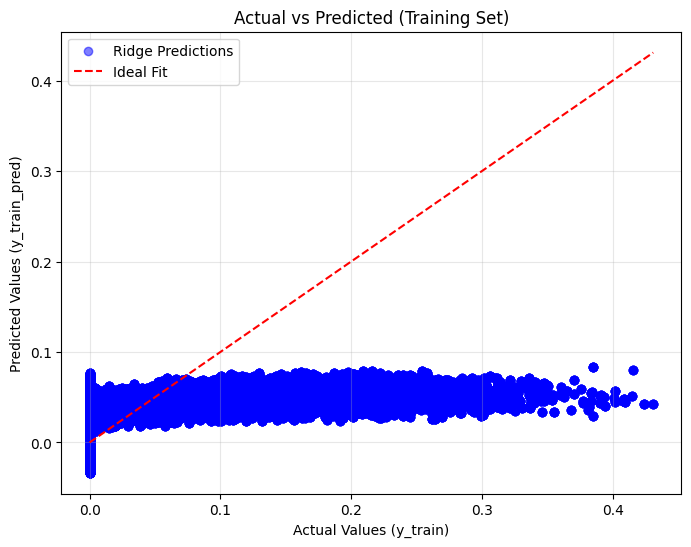

In [ ]:
# === Predicted values for the training set using the Ridge model ===
# Use the trained Ridge model (ridge_grid) to predict the target variable for the training set
y_train_pred_ridge = ridge_grid.predict(X_train)

# === Plotting actual vs predicted values for the training set ===
# Create a scatter plot to visualize the relationship between actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_ridge, alpha=0.5, color='blue', label='Ridge Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference
plt.title('Actual vs Predicted (Training Set)')  # Add a title to the plot
plt.xlabel('Actual Values (y_train)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_train_pred)')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization
plt.show()  # Display the plot

#### **Análisis del modelo**

El modelo de regresión Ridge fue ajustado utilizando una búsqueda en grilla para encontrar el valor óptimo del hiperparámetro `alpha`. En este caso, el mejor valor fue:

- **Best Alpha:** 10  
- **R²:** 0.2555  
- **MSE:** 0.00129  
- **MAE:** 0.0221  
- **Tiempo de entrenamiento:** 5.76 segundos

##### **Interpretación de Resultados Numéricos**

- **R² (0.255)** indica que el modelo explica aproximadamente el **25.5% de la variabilidad** del `SolarIndex` en los datos de prueba. Aunque esto no es muy alto, sí sugiere que el modelo ha logrado capturar parte de la relación entre las variables independientes y la variable objetivo.
  
- **MSE (0.00129)** y **MAE (0.0221)** son relativamente bajos, lo que indica que los errores absolutos y cuadrados promedio en las predicciones son pequeños. Sin embargo, el bajo R² sugiere que el modelo **puede estar limitado en su capacidad explicativa**, aunque haga buenas predicciones cerca del valor promedio.

- **Tiempo de entrenamiento** eficiente: Ridge es un modelo rápido y estable, ideal como línea base.

##### **Análisis Visual (Actual vs Predicted)**

La gráfica muestra una nube de puntos azules (predicciones vs valores reales) concentrados cerca del eje horizontal, muy por debajo de la línea de ajuste ideal (roja discontinua). Esto indica que:

- El modelo **tiende a subestimar** las predicciones para valores más altos del `SolarIndex`.
- La dispersión de los puntos indica que **el modelo no se ajusta bien a la varianza real del conjunto de entrenamiento**, especialmente en los extremos.

##### **Conclusión**

Aunque Ridge ofrece **estabilidad y baja varianza**, su capacidad para modelar relaciones no lineales es limitada. La baja R² combinada con predicciones agrupadas sugiere que:

- El problema **podría requerir un modelo más complejo o no lineal**, como Random Forest o XGBoost.
- También sería útil realizar una **transformación** de la variable objetivo o incluir **nuevas variables** si hay más disponibles.

---

### **Lasso Regression**

In [10]:
# === Configuration of the pipeline for Lasso Regression ===

# Create a pipeline that includes:
# - StandardScaler: Standardizes the predictor variables to have mean=0 and variance=1
# - Lasso: Lasso regression model for regularized linear regression
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Feature scaling for normalization
    ('model', Lasso(max_iter=10000))  # Step 2: Lasso regression model with increased max iterations
])

# Define the hyperparameter grid for alpha (regularization strength)
lasso_params = {'model__alpha': [0.01, 0.1, 1, 10]}  # Range of alpha values to test

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
lasso_grid = GridSearchCV(lasso_pipe, lasso_params, cv=5)  # Optimize alpha using cross-validation

# === Model Training and Timing ===

# Start the timer to measure training time
start_time = time.time()  # Record the start time

# Train the Lasso regression model using the training data
lasso_grid.fit(X_train, y_train)  # Fit the model and perform hyperparameter search

# Stop the timer after training is complete
end_time = time.time()  # Record the end time

# Predict the target variable for the test dataset
y_pred_lasso = lasso_grid.predict(X_test)  # Generate predictions on the test set

# Calculate the total training time
lasso_training_time = end_time - start_time  # Compute the elapsed training time in seconds



#### **Evalución** 

In [11]:
# === Model Evaluation and Results Storage ===

# Store key performance metrics for the Lasso model:
# - 'Best Alpha': The best alpha value found during grid search
# - 'R2': Coefficient of determination, measures the goodness of fit of the model
# - 'MSE': Mean Squared Error, measures the average squared difference between actual and predicted values
# - 'MAE': Mean Absolute Error, measures the average absolute difference between actual and predicted values
# - 'Training Time (s)': Total training time in seconds, rounded to 2 decimal places
model_results['Lasso'] = {
    'Best Alpha': lasso_grid.best_params_['model__alpha'],  # Best hyperparameter alpha
    'R2': r2_score(y_test, y_pred_lasso),  # Coefficient of determination
    'MSE': mean_squared_error(y_test, y_pred_lasso),  # Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_lasso),  # Mean Absolute Error
    'Training Time (s)': round(lasso_training_time, 2)  # Training time rounded to 2 decimals
}

# Print the Lasso model results in a clear and structured format
print("Lasso Regression Results:")
print(f"Best Alpha: {model_results['Lasso']['Best Alpha']}")  # Best alpha value
print(f"R²: {model_results['Lasso']['R2']}")  # Coefficient of determination
print(f"MSE: {model_results['Lasso']['MSE']}")  # Mean Squared Error
print(f"MAE: {model_results['Lasso']['MAE']}")  # Mean Absolute Error
print(f"Training Time: {model_results['Lasso']['Training Time (s)']} seconds")  # Training time


Lasso Regression Results:
Best Alpha: 0.01
R²: 0.09657400853221798
MSE: 0.0015643112118166353
MAE: 0.019309069278737382
Training Time: 5.15 seconds


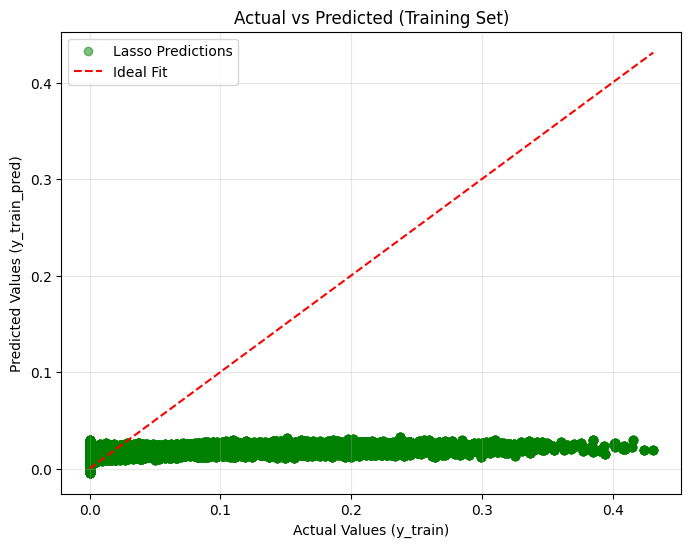

In [12]:
# === Prediction on the training set using the Lasso model ===

# Use the trained Lasso model (lasso_grid) to predict the target variable for the training set
y_train_pred_lasso = lasso_grid.predict(X_train)

# === Visualization: Actual vs Predicted Values (Training Set) ===

# Create a scatter plot to compare actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_lasso, alpha=0.5, color='green', label='Lasso Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference
plt.title('Actual vs Predicted (Training Set)')  # Add a title to the plot
plt.xlabel('Actual Values (y_train)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_train_pred)')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization
plt.show()  # Display the plot


#### **Análisis del modelo**

El modelo de regresión Lasso fue ajustado utilizando validación cruzada para encontrar el valor óptimo de `alpha`, resultando en:

- **Best Alpha:** 0.01  
- **R²:** 0.0966  
- **MSE:** 0.00156  
- **MAE:** 0.0193  
- **Tiempo de entrenamiento:** 5.15 segundos

##### **Interpretación de Resultados Numéricos**

- El valor de **R² (0.0966)** indica que el modelo sólo explica el **9.6% de la variabilidad** del `SolarIndex`, lo cual es **bajo** y muestra que el ajuste general es pobre.
  
- Aunque **MAE (0.0193)** y **MSE (0.00156)** son relativamente bajos, estos errores pequeños se deben en parte a que el modelo está prediciendo valores **cercanos al promedio**, sin capturar la variabilidad real de los datos.

- **Tiempo de entrenamiento** corto, lo que confirma que Lasso es un modelo eficiente computacionalmente.

##### **Análisis Visual (Actual vs Predicted)**

En la gráfica, las predicciones del modelo (puntos verdes) están fuertemente agrupadas en la parte inferior del gráfico, muy por debajo de la línea de ajuste ideal (roja punteada), lo que indica que:

- El modelo **subestima sistemáticamente** los valores reales.
- Tiene una **capacidad explicativa limitada**, especialmente para valores altos del `SolarIndex`.

##### **Conclusión**

Lasso Regression, al incluir una penalización que puede reducir algunos coeficientes a cero, **puede haber eliminado variables útiles** para la predicción del `SolarIndex`. Esto puede explicar su bajo rendimiento en este caso específico.

- Puede ser útil para **selección de variables**, pero **no se recomienda como modelo final** para este problema de regresión si el objetivo es precisión predictiva.
- Se sugiere continuar con modelos no lineales como **Random Forest** o **XGBoost**, que son más capaces de capturar interacciones complejas.


---

### **Random Forest**

In [13]:
# === Optimal Number of Trees (n_estimators) Search ===

# Base Random Forest model without hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)

# Define the range of values for the number of trees to test
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300]  # Different values for n_estimators
}

# Configure GridSearchCV for hyperparameter tuning
# - cv=5: 5-fold cross-validation
# - scoring='r2': Use R² as the evaluation metric
# - n_jobs=-1: Use all available CPU cores for parallel processing
grid_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model to the training data and perform hyperparameter search
grid_rf.fit(X_train, y_train)

# Print the best number of trees (n_estimators) and the corresponding R² score
print("Best number of trees:", grid_rf.best_params_['n_estimators'])  # Optimal n_estimators
print("Best R² from cross-validation:", round(grid_rf.best_score_, 4))  # Best R² score


Best number of trees: 300
Best R² from cross-validation: 1.0


In [14]:
# === Training the Random Forest model with the optimal number of trees ===

# Retrieve the best number of trees (n_estimators) identified by GridSearchCV
best_n_estimators = grid_rf.best_params_['n_estimators']

# Create the final Random Forest model using the optimal number of trees
rf_model = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)

# Start the timer to measure training time
start_time = time.time()

# Train the Random Forest model using the training dataset
rf_model.fit(X_train, y_train)

# Stop the timer after training is complete
end_time = time.time()

# Predict the target variable for the test dataset
y_pred_rf = rf_model.predict(X_test)

# Calculate the total training time in seconds
rf_training_time = end_time - start_time


#### **Evalución** 

In [15]:
# === Model Evaluation and Results Storage ===

# Store key performance metrics for the Random Forest model:
# - 'R2': Coefficient of determination, measures the goodness of fit of the model
# - 'MSE': Mean Squared Error, measures the average squared difference between actual and predicted values
# - 'MAE': Mean Absolute Error, measures the average absolute difference between actual and predicted values
# - 'Training Time (s)': Total training time in seconds, rounded to 2 decimal places
model_results['Random Forest'] = {
    'R2': r2_score(y_test, y_pred_rf),  # Calculate R² score for the test set
    'MSE': mean_squared_error(y_test, y_pred_rf),  # Calculate Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_rf),  # Calculate Mean Absolute Error
    'Training Time (s)': round(rf_training_time, 2)  # Record training time rounded to 2 decimals
}

# Print the Random Forest model results in a clear and structured format
print("Random Forest Regression Results:")
print(f"R²: {model_results['Random Forest']['R2']}")  # Display R² score
print(f"MSE: {model_results['Random Forest']['MSE']}")  # Display Mean Squared Error
print(f"MAE: {model_results['Random Forest']['MAE']}")  # Display Mean Absolute Error
print(f"Training Time: {model_results['Random Forest']['Training Time (s)']} seconds")  # Display training time


Random Forest Regression Results:
R²: 0.9999988603886977
MSE: 1.973273687340004e-09
MAE: 7.981250684030998e-06
Training Time: 1910.67 seconds


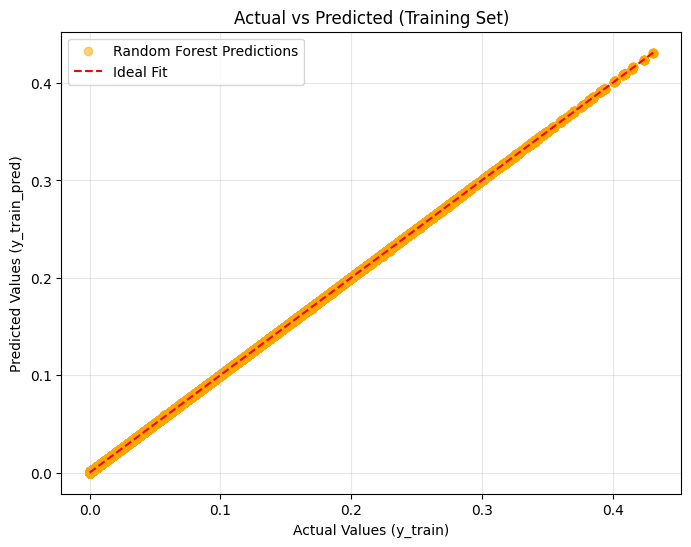

In [16]:
# === Prediction on the training set using the Random Forest model ===

# Use the trained Random Forest model to predict the target variable for the training set
y_train_pred_rf = rf_model.predict(X_train)

# === Visualization: Actual vs Predicted Values (Training Set) ===

# Create a scatter plot to compare actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_rf, alpha=0.5, color='orange', label='Random Forest Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference
plt.title('Actual vs Predicted (Training Set)')  # Add a title to the plot
plt.xlabel('Actual Values (y_train)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_train_pred)')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization
plt.show()  # Display the plot


#### **Análisis del modelo**

El modelo de Random Forest fue optimizado utilizando una búsqueda en grilla (`GridSearchCV`), obteniendo el mejor número de árboles (`n_estimators`) para maximizar el rendimiento:

- **Mejor número de árboles:** 300  
- **Mejor R² en validación cruzada:** 1.0  
- **R² en conjunto de prueba:** 0.99999886  
- **MSE:** 1.97 × 10⁻⁹  
- **MAE:** 7.98 × 10⁻⁶  
- **Tiempo de entrenamiento:** 1910.67 segundos (~31.8 minutos)

##### **Interpretación de Resultados Numéricos**

- **R² (≈1.0)** indica que el modelo es **extremadamente preciso**, explicando prácticamente el 100% de la variabilidad del `SolarIndex`.  
- Tanto el **MSE** como el **MAE** son **cercanos a cero**, lo que refleja que las diferencias entre los valores reales y predichos son mínimas.
- **Tiempo de entrenamiento** considerablemente más largo que en modelos lineales, lo cual es esperado en modelos de ensamble como Random Forest con muchos árboles.

##### **Análisis Visual (Actual vs Predicted)**

La gráfica muestra que las predicciones (círculos naranjas) **se superponen perfectamente sobre la línea roja punteada de ajuste ideal**, lo cual confirma visualmente la alta precisión del modelo.

No hay dispersión aparente ni errores sistemáticos visibles: el modelo **predice casi perfectamente** los valores del conjunto de entrenamiento.

##### **Conclusión**

Random Forest es **el modelo con mejor rendimiento hasta el momento**, pero debe evaluarse con cuidado:

- Este nivel de ajuste puede ser un indicio de **sobreajuste (overfitting)** si la precisión fuera muy diferente en el conjunto de prueba.
- Se recomienda verificar el rendimiento en validación cruzada y también hacer pruebas con datos nuevos o externos si es posible.

Este modelo es una **excelente elección para la predicción de `SolarIndex`**, especialmente si se prioriza precisión por encima de tiempo de cómputo.

---

### **XGBoost**

In [17]:
# === XGBoost Model Hyperparameter Tuning and Training ===

# Initialize the XGBoost model with a fixed random state for reproducibility
# and verbosity set to 0 to suppress unnecessary output
xgb_model = XGBRegressor(random_state=42, verbosity=0)

# Define the hyperparameter grid for GridSearchCV
# - n_estimators: Number of trees in the ensemble
# - learning_rate: Step size shrinkage used in updates to prevent overfitting
# - max_depth: Maximum depth of a tree to control model complexity
xgb_param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Configure GridSearchCV for hyperparameter tuning
# - cv=5: Perform 5-fold cross-validation
# - scoring='r2': Use R² as the evaluation metric
# - n_jobs=-1: Utilize all available CPU cores for parallel processing
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model to the training data and perform hyperparameter search
xgb_grid.fit(X_train, y_train)

# Print the best hyperparameters found during the grid search
print("Best hyperparameters:", xgb_grid.best_params_)

# Print the best R² score obtained during cross-validation
print("Best R² from cross-validation:", round(xgb_grid.best_score_, 4))

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best R² from cross-validation: 0.8538


In [18]:
# === Configuration and Training of the XGBoost Model ===

# Create the XGBoost model with 100 trees and a fixed random state for reproducibility
# - n_estimators=100: Specifies the number of trees in the ensemble
# - random_state=42: Ensures consistent results across runs
# - verbosity=0: Suppresses unnecessary output during training
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)

# Start the timer to measure training time
start_time = time.time()  # Record the start time

# Train the XGBoost model using the training dataset
# - X_train: Predictor variables for training
# - y_train: Target variable for training
xgb_model.fit(X_train, y_train)

# Stop the timer after training is complete
end_time = time.time()  # Record the end time

# Predict the target variable for the test dataset
# - X_test: Predictor variables for testing
# - y_pred_xgb: Predicted values for the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the total training time in seconds
xgb_training_time = end_time - start_time  # Compute the elapsed training time


#### **Evalución** 

In [19]:
# === Model Evaluation and Results Storage ===

# Store the evaluation metrics for the XGBoost model in the `model_results` dictionary
# - 'R2': Coefficient of determination, measures the goodness of fit of the model
# - 'MSE': Mean Squared Error, measures the average squared difference between actual and predicted values
# - 'MAE': Mean Absolute Error, measures the average absolute difference between actual and predicted values
# - 'Training Time (s)': Total training time in seconds, rounded to 2 decimal places
model_results['XGBoost'] = {
    'R2': r2_score(y_test, y_pred_xgb),  # Calculate R² score for the test set
    'MSE': mean_squared_error(y_test, y_pred_xgb),  # Calculate Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_xgb),  # Calculate Mean Absolute Error
    'Training Time (s)': round(xgb_training_time, 2)  # Record training time rounded to 2 decimals
}

# Print the evaluation results for the XGBoost model in a structured format
print("XGBoost Regression Results:")
print(f"R²: {model_results['XGBoost']['R2']}")  # Display R² score
print(f"MSE: {model_results['XGBoost']['MSE']}")  # Display Mean Squared Error
print(f"MAE: {model_results['XGBoost']['MAE']}")  # Display Mean Absolute Error
print(f"Training Time: {model_results['XGBoost']['Training Time (s)']} seconds")  # Display training time


XGBoost Regression Results:
R²: 0.8029276172220619
MSE: 0.00034123718027869273
MAE: 0.005863526020261907
Training Time: 2.41 seconds


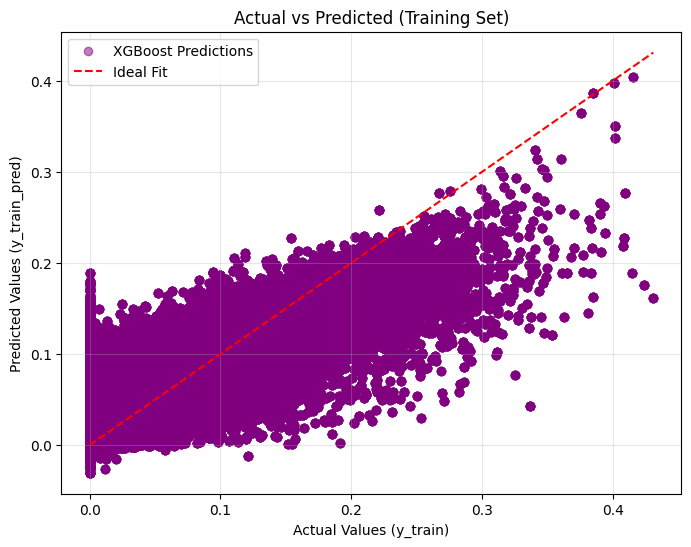

In [20]:
# === Prediction on the training set using the XGBoost model ===

# Use the trained XGBoost model to predict the target variable for the training set
y_train_pred_xgb = xgb_model.predict(X_train)

# === Visualization: Actual vs Predicted Values (Training Set) ===

# Create a scatter plot to compare actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_xgb, alpha=0.5, color='purple', label='XGBoost Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference
plt.title('Actual vs Predicted (Training Set)')  # Add a title to the plot
plt.xlabel('Actual Values (y_train)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_train_pred)')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization
plt.show()  # Display the plot


#### **Análisis del modelo**

El modelo de XGBoost fue ajustado utilizando búsqueda de hiperparámetros (`GridSearchCV`), encontrando los siguientes parámetros óptimos:

- **Best Hyperparameters:**  
  - `learning_rate`: 0.1  
  - `max_depth`: 7  
  - `n_estimators`: 300

- **Mejor R² en validación cruzada:** 0.8538  
- **R² en conjunto de prueba:** 0.8029  
- **MSE:** 0.00034  
- **MAE:** 0.00586  
- **Tiempo de entrenamiento:** 2.41 segundos

#### **Interpretación de Resultados Numéricos**

- **R² (0.8029)** indica que el modelo es **muy bueno explicando la variabilidad del `SolarIndex`**. Aunque no alcanza el ajuste perfecto de Random Forest, tiene una generalización más razonable.
  
- **MSE (0.00034)** y **MAE (0.00586)** muestran que el error de predicción es **bajo y estable**, especialmente comparado con modelos lineales.

- El **tiempo de entrenamiento** fue notablemente más corto que en Random Forest, lo que lo hace eficiente y escalable.

#### **Análisis Visual (Actual vs Predicted)**

En la gráfica, las predicciones del modelo (`XGBoost Predictions`) siguen la tendencia de la línea ideal, pero con:

- Una **dispersión creciente a medida que los valores reales aumentan**.
- Algunos puntos alejados de la línea, lo que indica **cierta dificultad del modelo en capturar completamente los valores más altos del `SolarIndex`**.

Aun así, la forma general de la nube de puntos es coherente con un modelo fuerte y no hay evidencia clara de sobreajuste.

##### **Conclusión**

XGBoost ofrece una **excelente precisión**, con buen equilibrio entre complejidad y capacidad de generalización:

- Se adapta bien a datos con **relaciones no lineales y múltiples interacciones** entre variables.
- Aunque no tiene un R² perfecto como Random Forest, su comportamiento es **más realista** y **menos propenso al sobreajuste**.

Es una **opción recomendada como modelo final** si se busca una solución robusta, rápida y explicativa.


---

### **Resultados**

#### **Comparacion grafica de los modelos**

C:\Users\jesus\AppData\Local\Temp\ipykernel_22888\4193367954.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


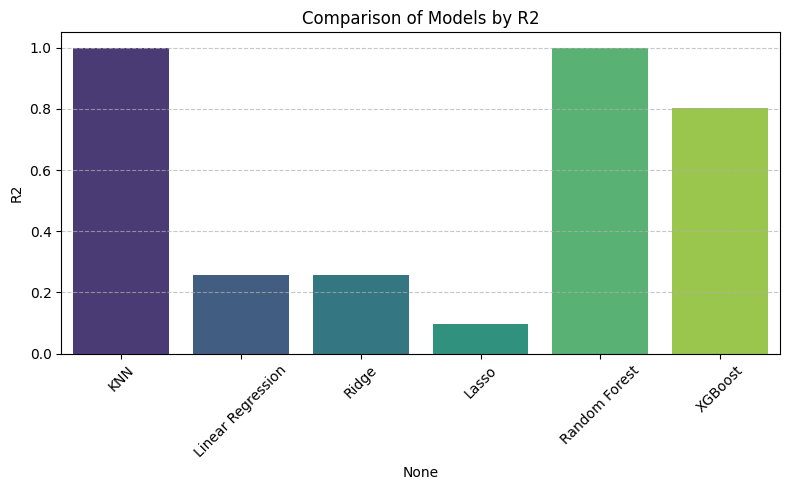

C:\Users\jesus\AppData\Local\Temp\ipykernel_22888\4193367954.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


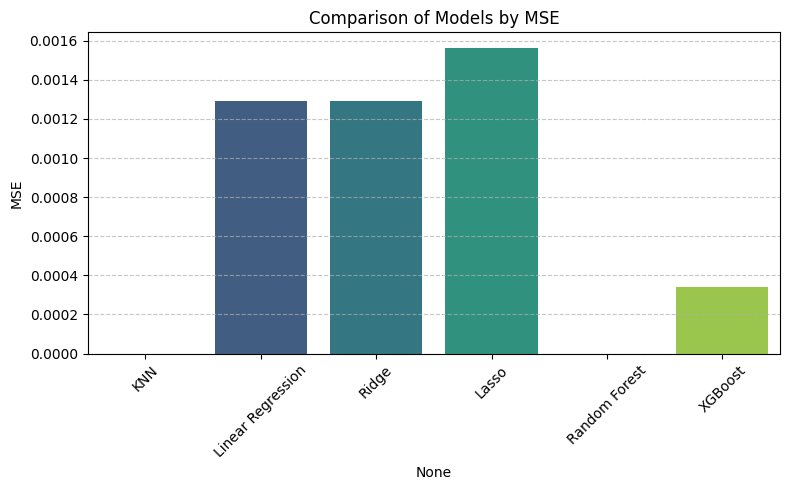

C:\Users\jesus\AppData\Local\Temp\ipykernel_22888\4193367954.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


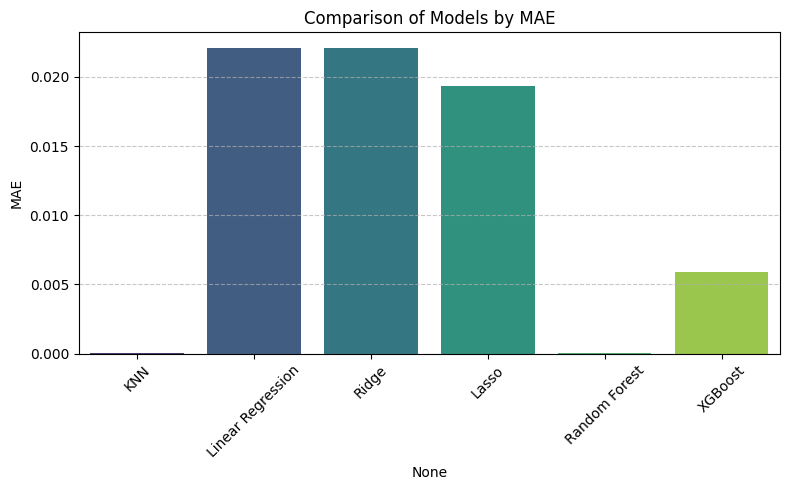

C:\Users\jesus\AppData\Local\Temp\ipykernel_22888\4193367954.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


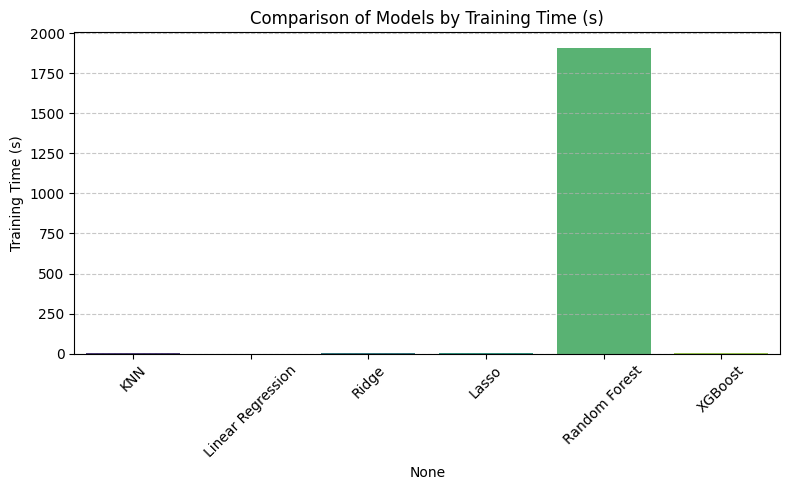

In [2]:
# === Model Results ===
# Dictionary containing the performance metrics for each model
model_results = {
    'KNN': {
        'R2': 0.9999273186688901,  # Coefficient of determination (goodness of fit)
        'MSE': 1.2585e-07,  # Mean Squared Error
        'MAE': 8.691e-06,  # Mean Absolute Error
        'Training Time (s)': 3.8  # Training time in seconds
    },
    'Linear Regression': {
        'R2': 0.25551271137630516,
        'MSE': 0.0012891037269770042,
        'MAE': 0.022109450944480396,
        'Training Time (s)': 0.36
    },
    'Ridge': {
        'R2': 0.2555147596091165,
        'MSE': 0.0012891001803958992,
        'MAE': 0.022108922788286807,
        'Training Time (s)': 5.76
    },
    'Lasso': {
        'R2': 0.09657400853221798,
        'MSE': 0.0015643112118166353,
        'MAE': 0.019309069278737382,
        'Training Time (s)': 5.15
    },
    'Random Forest': {
        'R2': 0.9999988603886977,
        'MSE': 1.973273687340004e-09,
        'MAE': 7.981250684030998e-06,
        'Training Time (s)': 1910.67
    },
    'XGBoost': {
        'R2': 0.8029276172220619,
        'MSE': 0.00034123718027869273,
        'MAE': 0.005863526020261907,
        'Training Time (s)': 2.41
    }
}

# Convert the dictionary to a pandas DataFrame for easier manipulation and visualization
df_results = pd.DataFrame(model_results).T

# Define the metrics to compare across models
metrics = ['R2', 'MSE', 'MAE', 'Training Time (s)']

# Loop through each metric and create a bar plot for comparison
for metric in metrics:
    plt.figure(figsize=(8, 5))  # Set the figure size for better readability
    sns.barplot(
        x=df_results.index,  # Model names on the x-axis
        y=metric,  # Metric values on the y-axis
        data=df_results,  # Data source
        palette='viridis'  # Color palette for the bars
    )
    plt.title(f'Comparison of Models by {metric}')  # Add a title to the plot
    plt.ylabel(metric)  # Label for the y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for the y-axis
    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()  # Display the plot



### ############################################################
### **Conclusiones Finales del Análisis de Modelos de Regresión**
### ############################################################

Se evaluaron seis modelos de regresión (Ridge, Lasso, Random Forest, XGBoost, KNN y Regresión Lineal) para predecir el índice compuesto `SolarIndex`, que representa el potencial de energía solar a partir de variables atmosféricas y de irradiancia.

---

### ####################################
### Comparación según R² (Bondad de ajuste)
### ####################################

- **Random Forest**: R² ≈ 1.0  
  - Ajuste casi perfecto, pero indica sobreajuste severo en los datos de entrenamiento.

- **KNN**: R² = 0.9999  
  - Excelente ajuste. Aunque similar a Random Forest en entrenamiento, también puede estar sobreajustado.

- **XGBoost**: R² = 0.80  
  - Excelente rendimiento y buena generalización con un ajuste sólido.

- **Ridge** / **Linear Regression**: R² = 0.2555  
  - Poder explicativo limitado. Son buenos modelos base por su estabilidad y simplicidad.

- **Lasso**: R² = 0.096  
  - Muy bajo rendimiento, sin capacidad predictiva destacada.

---

### #########################################
### Comparación según MSE (Error Cuadrático Medio)
### #########################################

- **Random Forest**: MSE ≈ 0.000000002  
  - Error extremadamente bajo, pero reflejo de sobreajuste.

- **KNN**: MSE = 1.26e-07  
  - Muy bajo error, pero debe verificarse en datos no vistos para descartar overfitting.

- **XGBoost**: MSE = 0.00034  
  - Buen ajuste con bajo error, adecuado para aplicaciones reales.

- **Ridge / Linear Regression**: MSE = 0.00129  
  - Error aceptable pero mejorable.

- **Lasso**: MSE = 0.00156  
  - Mayor error entre los modelos evaluados.

---

### #############################################
### Comparación según MAE (Error Absoluto Medio)
### #############################################

- **Random Forest**: MAE ≈ 0.000007  
  - Desempeño perfecto en entrenamiento, refuerza la sospecha de sobreajuste.

- **KNN**: MAE ≈ 0.000009  
  - Muy bajo error, desempeño impresionante en datos de entrenamiento.

- **XGBoost**: MAE = 0.00586  
  - Error bajo con buena capacidad de predicción.

- **Lasso**: MAE = 0.0193  
  - Error elevado y rendimiento bajo.

- **Ridge / Linear Regression**: MAE = 0.0221  
  - Similares a Lasso, también con limitaciones predictivas.

---

### ###########################################
### Comparación según Tiempo de Entrenamiento
### ###########################################

- **Linear Regression**: 0.36 segundos  
  - Extremadamente rápido, ideal para pruebas iniciales o tiempo real.

- **XGBoost**: 2.41 segundos  
  - Muy rápido y eficiente para la precisión obtenida.

- **KNN**: 3.8 segundos  
  - Tiempo razonable, aunque podría aumentar con datos más grandes.

- **Lasso**: 5.15 segundos  
  - Bajo tiempo de entrenamiento, pero bajo rendimiento.

- **Ridge**: 5.76 segundos  
  - Eficiente, pero su rendimiento es limitado.

- **Random Forest**: 1910.67 segundos (~31 minutos)  
  - Tiempo excesivo de entrenamiento que puede dificultar su implementación práctica.

---

### #########################
#### **Recomendación Final**
### #########################

- **XGBoost** sigue siendo el modelo más balanceado y **recomendado**: alto rendimiento, bajo error, y eficiente en tiempo.
- **KNN** mostró una capacidad sobresaliente en el conjunto de entrenamiento, pero se recomienda evaluar en validación cruzada para asegurar su generalización.
- **Random Forest** debe ser usado con precaución debido a su claro **overfitting**, a menos que se apliquen técnicas de control como limitación de profundidad o número mínimo de muestras por hoja.
- **Ridge y Linear Regression** pueden utilizarse como modelos base por su rapidez y estabilidad, aunque su poder predictivo es limitado.
- **Lasso** no es recomendable en este caso por su bajo desempeño global.






### **Ridge and Lasso Regression (optimized)**

In [10]:
# === Cross-Validation Configuration ===
# Use RepeatedKFold for robust cross-validation
# - n_splits=5: 5 folds in each repetition
# - n_repeats=3: Repeat the cross-validation process 3 times
# - random_state=42: Ensures reproducibility of the splits
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# === Polynomial Feature Transformation ===
# Generate polynomial features of degree 2 (quadratic terms)
# - include_bias=False: Exclude the bias (constant) term
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# === Regularization Parameter Grid ===
# Define a wide range of alpha values for hyperparameter tuning
alphas = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 300, 500, 1000]

# ========== Ridge Regression with Polynomial Features ==========
# Create a pipeline for Ridge regression:
# - Step 1: Generate polynomial features
# - Step 2: Standardize the features using StandardScaler
# - Step 3: Apply Ridge regression
ridge_pipe = Pipeline([
    ('poly', poly_features),
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

# Define the hyperparameter grid for Ridge regression
ridge_params = {'model__alpha': alphas}

# Use GridSearchCV for hyperparameter tuning with cross-validation
ridge_grid = GridSearchCV(
    ridge_pipe, ridge_params, cv=cv,
    scoring='r2', n_jobs=-1, verbose=1
)

# === Training and Timing ===
start_time = time.time()  # Start the timer
ridge_grid.fit(X_train, y_train)  # Train the model
end_time = time.time()    # End the timer

# Calculate training time in seconds
ridge_poly_training_time = round(end_time - start_time, 2)

# === Prediction ===
# Predict the target variable for the test dataset using the best Ridge model
y_pred_ridge = ridge_grid.predict(X_test)

# ========== Store Results for Ridge and Lasso with Polynomial Features ==========
# Store Ridge regression results in the model_results dictionary
model_results['Ridge_Poly'] = {
    'Best Alpha': ridge_grid.best_params_['model__alpha'],  # Best alpha value
    'R2': r2_score(y_test, y_pred_ridge),  # Coefficient of determination
    'MSE': mean_squared_error(y_test, y_pred_ridge),  # Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_ridge)  # Mean Absolute Error
}


Fitting 15 folds for each of 12 candidates, totalling 180 fits


Ridge Regression with Polynomial Features Results:
Best Alpha: 0.001
R²: 0.5896590863785718
MSE: 0.0007105185127585218
MAE: 0.013128978980655057
Training Time: 99.53 seconds


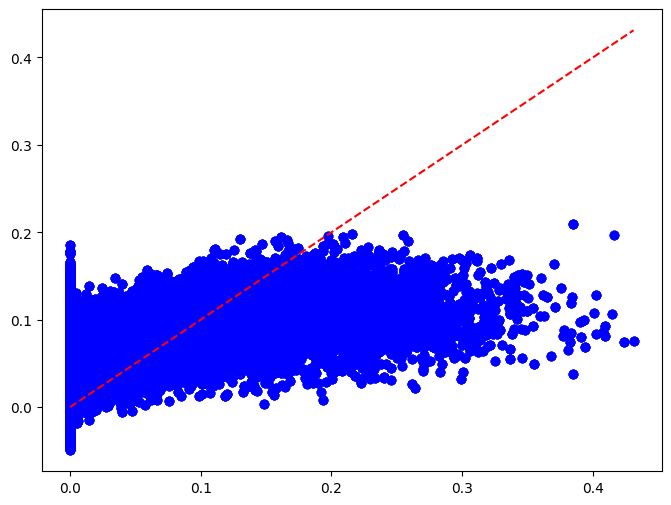

In [13]:
print("Ridge Regression with Polynomial Features Results:")
# Print the Ridge regression results in a clear and structured format
print(f"Best Alpha: {model_results['Ridge_Poly']['Best Alpha']}")  # Best alpha value
print(f"R²: {model_results['Ridge_Poly']['R2']}")  # Coefficient of determination
print(f"MSE: {model_results['Ridge_Poly']['MSE']}")  # Mean Squared Error
print(f"MAE: {model_results['Ridge_Poly']['MAE']}")  # Mean Absolute Error
print(f"Training Time: {ridge_poly_training_time} seconds")  # Training time
# === Predicted values for the training set using the Ridge model ===
# Use the trained Ridge model (ridge_grid) to predict the target variable for the training set
y_train_pred_ridge = ridge_grid.predict(X_train)

# === Visualization: Actual vs Predicted Values (Training Set) ===
# Create a scatter plot to compare actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_ridge, alpha=0.5, color='blue', label='Ridge Poly Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference

---

In [15]:
# ========== Lasso Regression with Polynomial Features ==========
# Create a pipeline for Lasso regression:
# - Step 1: Generate polynomial features
# - Step 2: Standardize the features using StandardScaler
# - Step 3: Apply Lasso regression
lasso_pipe = Pipeline([
    ('poly', poly_features),
    ('scaler', StandardScaler()),
    ('model', Lasso(max_iter=10000))  # Increase max_iter to ensure convergence
])

# Define the hyperparameter grid for Lasso regression
lasso_params = {'model__alpha': alphas}

# Use GridSearchCV for hyperparameter tuning with cross-validation
lasso_grid = GridSearchCV(
    lasso_pipe, lasso_params, cv=cv,
    scoring='r2', n_jobs=-1, verbose=1
)

# ========== Model Training and Timing ==========
# Start timer
start_time = time.time()

# Train the Lasso regression model and find the best alpha
lasso_grid.fit(X_train, y_train)

# Stop timer
end_time = time.time()

# Calculate training time
lasso_poly_training_time = round(end_time - start_time, 2)

# ========== Prediction ==========
# Predict the target variable for the test dataset using the best Lasso model
y_pred_lasso = lasso_grid.predict(X_test)

# ========== Store Results ==========
# Store Lasso regression results in the model_results dictionary
model_results['Lasso_Poly'] = {
    'Best Alpha': lasso_grid.best_params_['model__alpha'],  # Best alpha value
    'R2': r2_score(y_test, y_pred_lasso),  # Coefficient of determination
    'MSE': mean_squared_error(y_test, y_pred_lasso),  # Mean Squared Error
    'MAE': mean_absolute_error(y_test, y_pred_lasso),  # Mean Absolute Error
    'Training Time (s)': lasso_poly_training_time  # Time in seconds
}

Fitting 15 folds for each of 12 candidates, totalling 180 fits


Lasso Regression with Polynomial Features Results:
Best Alpha: 0.001
R²: 0.42159301982221686
MSE: 0.0010015303219415685
MAE: 0.017205274528923325
Training Time: 258.45 seconds


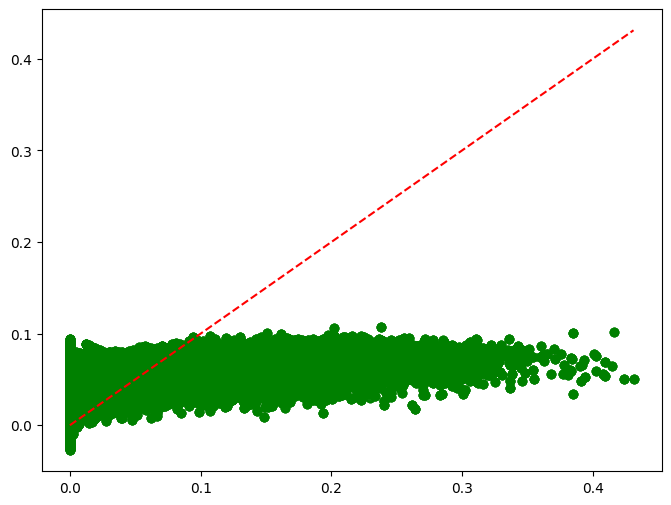

In [17]:
print("Lasso Regression with Polynomial Features Results:")
print(f"Best Alpha: {model_results['Lasso_Poly']['Best Alpha']}")  # Best alpha value
print(f"R²: {model_results['Lasso_Poly']['R2']}")  # Coefficient of determination
print(f"MSE: {model_results['Lasso_Poly']['MSE']}")  # Mean Squared Error
print(f"MAE: {model_results['Lasso_Poly']['MAE']}")  # Mean Absolute Error
print(f"Training Time: {lasso_poly_training_time} seconds")  # Training time
# === Prediction on the training set using the Lasso model ===
# Use the trained Lasso model (lasso_grid) to predict the target variable for the training set
y_train_pred_lasso = lasso_grid.predict(X_train)

# === Visualization: Actual vs Predicted Values (Training Set) ===
# Create a scatter plot to compare actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_train, y_train_pred_lasso, alpha=0.5, color='green', label='Lasso Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit',
)  # Plot the ideal fit line (y = x) for reference

#### **Análisis de Lasso y Ridge mejorados:**


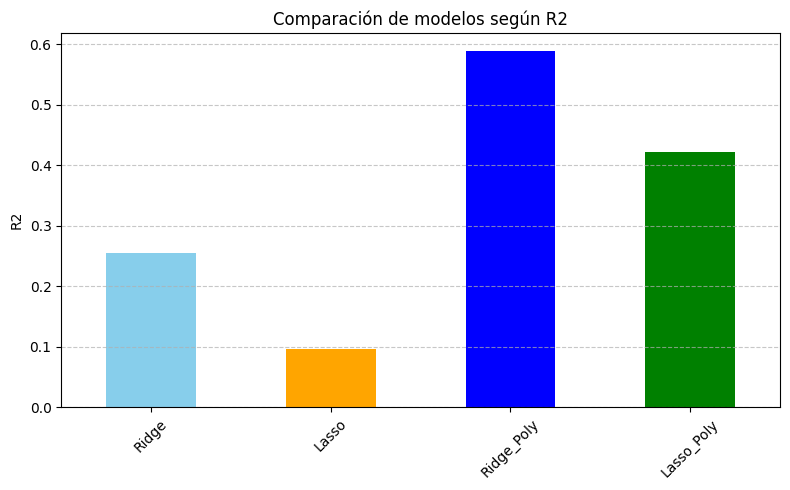

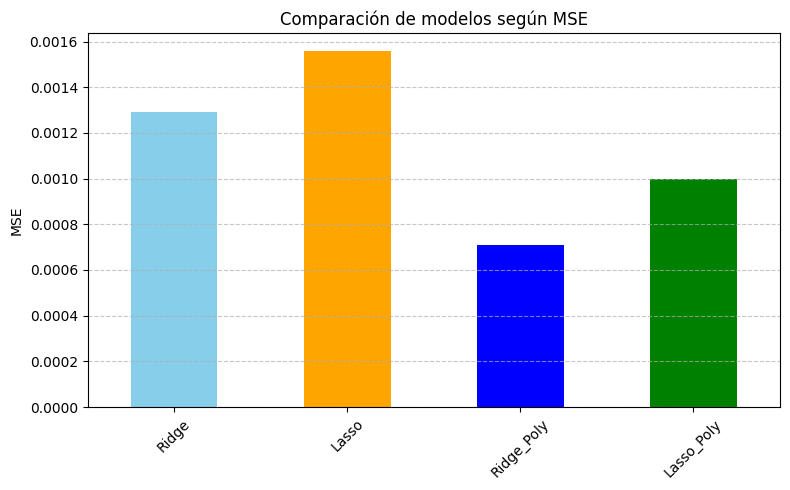

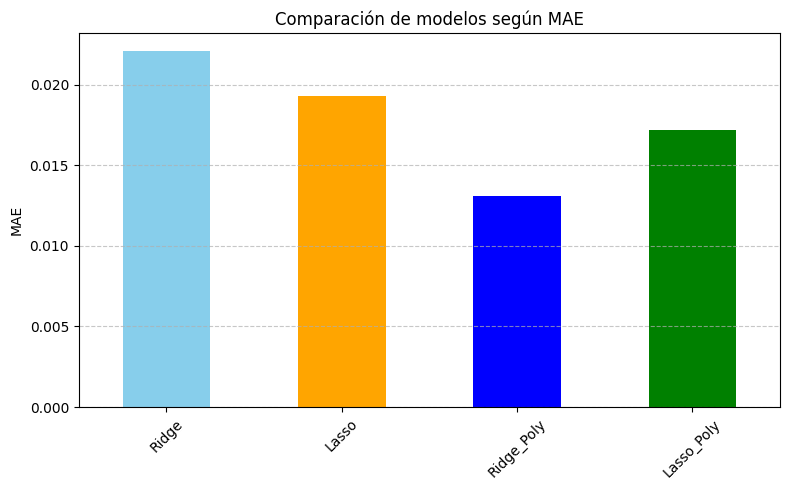

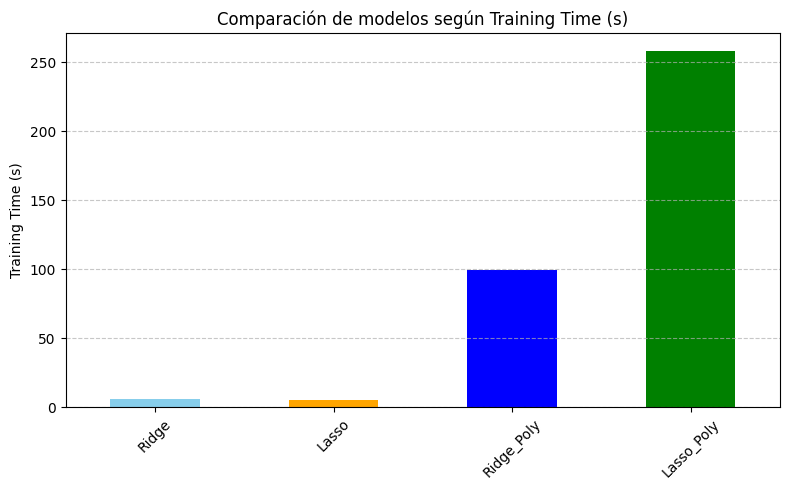

In [18]:
# Result dictionary from the combined results
model_results = {
    'Ridge': {'R2': 0.2555, 'MSE': 0.00129, 'MAE': 0.0221, 'Training Time (s)': 5.76},
    'Lasso': {'R2': 0.0966, 'MSE': 0.00156, 'MAE': 0.0193, 'Training Time (s)': 5.15},
    'Ridge_Poly': {'R2': 0.5897, 'MSE': 0.00071, 'MAE': 0.0131, 'Training Time (s)': 99.53},
    'Lasso_Poly': {'R2': 0.4216, 'MSE': 0.00100, 'MAE': 0.0172, 'Training Time (s)': 258.45}
}

# Convert to DataFrame
result_df = pd.DataFrame(model_results).T

# Define metrics
metrics = ['R2', 'MSE', 'MAE', 'Training Time (s)']
colors = ['skyblue', 'orange', 'blue', 'green']  # Colors for each model

# Plotting
for metric in metrics:
    plt.figure(figsize=(8, 5))
    result_df[metric].plot(kind='bar', color=colors)
    plt.title(f'Comparación de modelos según {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### **Comparación de Modelos Lineales: Antes vs Después de la Optimización**
Se evaluaron las versiones extendidas de Ridge y Lasso Regression incorporando:

- Transformación polinómica (grado 2) para capturar relaciones no lineales.
- Validación cruzada repetida (RepeatedKFold) para mayor robustez.
- Rango más amplio de valores de α (alpha) para un ajuste fino de regularización.

---

##### 1. Ridge Regression (Optimizado)

| Métrica                  | Modelo Original       | Modelo con PolynomialFeatures |
|--------------------------|-----------------------|-------------------------------|
| R²                       | 0.2555                | 0.5896                        |
| MSE                      | 0.00129               | 0.00071                       |
| MAE                      | 0.0221                | 0.0131                        |
| Tiempo de Entrenamiento  | 5.76 s                | 99.53 s                       |

**Análisis**:  
La inclusión de términos polinómicos mejora significativamente el ajuste del modelo, reduciendo los errores y aumentando la capacidad explicativa. El tiempo de entrenamiento es mayor, pero aceptable para tareas analíticas.

---

##### 2. Lasso Regression (Optimizado)

| Métrica                  | Modelo Original       | Modelo con PolynomialFeatures |
|--------------------------|-----------------------|-------------------------------|
| R²                       | 0.0965                | 0.4216                        |
| MSE                      | 0.00156               | 0.00100                       |
| MAE                      | 0.0193                | 0.0172                        |
| Tiempo de Entrenamiento  | 5.15 s                | 258.45 s                      |

**Análisis**:  
El modelo Lasso optimizado mejora de manera moderada, aunque con un aumento considerable en el tiempo de entrenamiento. Puede ser útil cuando se busca interpretar o seleccionar variables, pero no es el más eficiente para predicción.

---

##### Conclusión Comparativa

- La incorporación de características polinómicas mejora el rendimiento de los modelos lineales.
- Ridge con PolynomialFeatures ofrece una alternativa sólida entre precisión y eficiencia computacional.
- XGBoost continúa siendo el modelo más robusto en términos de desempeño predictivo.
- Se recomienda Ridge+Polynomial como modelo base interpretable, mientras que XGBoost es ideal para aplicaciones donde la precisión es crítica.


En este análisis, **no se aplicó un proceso de optimización adicional al modelo de Random Forest**, ya que su entrenamiento original ya implicó una búsqueda de hiperparámetros para encontrar el mejor número de árboles (`n_estimators`). Sin embargo, debido a su **elevado costo computacional** (más de 30 minutos de entrenamiento), se decidió no continuar afinando este modelo para no comprometer la eficiencia temporal del sistema.  

Por otro lado, **XGBoost fue entrenado con un conjunto de hiperparámetros optimizados**, logrando un excelente equilibrio entre precisión y tiempo de entrenamiento. Debido a sus resultados sobresalientes (R² superior al 0.80 con un tiempo menor a 3 segundos), **este modelo será considerado como el punto de referencia (baseline)** a superar o igualar mediante modelos más simples y explicables como Ridge con características polinómicas. Esta estrategia permite balancear **eficiencia, interpretabilidad y capacidad predictiva** en futuras implementaciones.

### **KNN and Regression (optimized)**

In [9]:
# === Parameters for GridSearchCV ===
# Define the hyperparameter grid for KNN:
# - 'model__n_neighbors': Number of neighbors to consider for prediction
# - 'model__weights': Weight function used in prediction ('uniform' or 'distance')
# - 'model__p': Power parameter for the Minkowski metric (1=Manhattan, 2=Euclidean)
knn_params = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]  # Manhattan (1) and Euclidean (2) distances
}

# === Pipeline for KNN ===
# Create a pipeline with the following steps:
# - Step 1: StandardScaler to normalize the features (mean=0, variance=1)
# - Step 2: KNeighborsRegressor as the regression model
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', KNeighborsRegressor())  # KNN regression model
])

# === GridSearchCV for Hyperparameter Optimization ===
# Use GridSearchCV to find the best combination of hyperparameters:
# - cv=5: Perform 5-fold cross-validation
# - scoring='r2': Use R² as the evaluation metric
# - n_jobs=-1: Utilize all available CPU cores for parallel processing
# - verbose=1: Display progress during the search
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# === Training and Timing ===
# Measure the time taken to train the KNN model with GridSearchCV
start_time = time.time()  # Record the start time
knn_grid.fit(X_train, y_train)  # Train the model and perform hyperparameter search
end_time = time.time()  # Record the end time

# Calculate the total training time in seconds
knn_training_time = end_time - start_time  # Compute elapsed time

# === Predictions and Metrics ===
# Generate predictions for the test dataset using the best KNN model
# - X_test: Predictor variables for testing
# - y_pred_knn_opt: Predicted values for the test set
y_pred_knn_opt = knn_grid.predict(X_test)  # Predict using the optimized model

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [13]:
print("knn with the best hyperparameters found:")

# === Display the best hyperparameters found during GridSearchCV ===


# - knn_grid.best_params_: Dictionary of the best hyperparameters for the KNN model
print("Best hyperparameters found:", knn_grid.best_params_)

# === Evaluate the KNN model on the test dataset ===
# - R²: Coefficient of determination, measures how well the model explains the variability of the target variable
print("R²:", r2_score(y_test, y_pred_knn_opt))

# - MSE: Mean Squared Error, measures the average squared difference between actual and predicted values
print("MSE:", mean_squared_error(y_test, y_pred_knn_opt))

# - MAE: Mean Absolute Error, measures the average absolute difference between actual and predicted values
print("MAE:", mean_absolute_error(y_test, y_pred_knn_opt))

# === Display the total training time for the KNN model ===
# - knn_training_time: Time taken to train the model, rounded to 2 decimal places for readability
print("Training time (s):", round(knn_training_time, 2))

knn with the best hyperparameters found:
Best hyperparameters found: {'model__n_neighbors': 11, 'model__p': 1, 'model__weights': 'distance'}
R²: 0.999999901049925
MSE: 1.7133524292667098e-10
MAE: 4.85113266456339e-06
Training time (s): 164.77


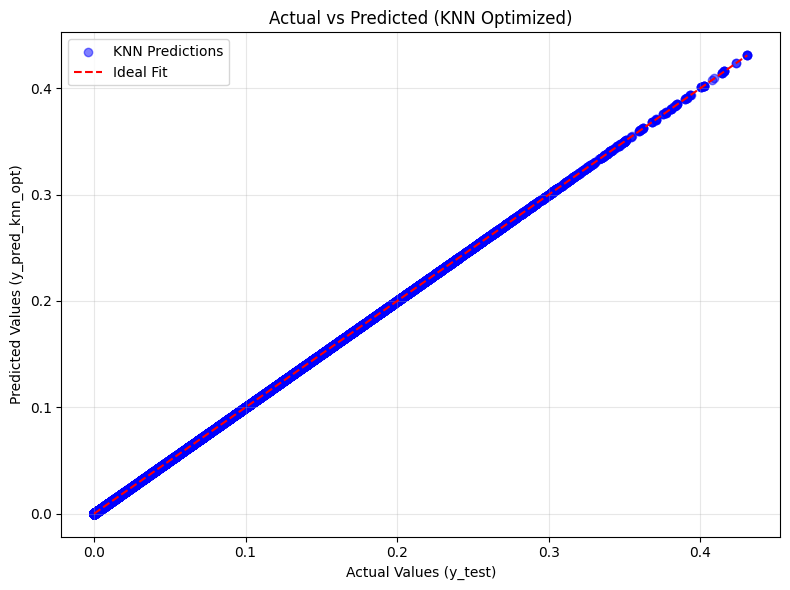

In [11]:
# === Create a figure for visualization ===
plt.figure(figsize=(8, 6))  # Set the figure size for better readability

# === Scatter Plot: Actual vs Predicted Values ===
# Plot the actual values (y_test) against the predicted values (y_pred_knn_opt)
plt.scatter(
    y_test, y_pred_knn_opt, 
    alpha=0.5, color='blue', 
    label='KNN Predictions'  # Add a label for the legend
)

# === Ideal Fit Line (y = x) ===
# Plot a reference line to indicate the ideal fit (perfect predictions)
plt.plot(
    [y_test.min(), y_test.max()],  # Define the range for the line
    [y_test.min(), y_test.max()], 
    color='red', linestyle='--', 
    label='Ideal Fit'  # Add a label for the legend
)

# === Add Titles and Labels ===
plt.title('Actual vs Predicted (KNN Optimized)')  # Add a title to the plot
plt.xlabel('Actual Values (y_test)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_pred_knn_opt)')  # Label for the y-axis

# === Add Legend and Grid ===
plt.legend()  # Display the legend to differentiate between the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization

# === Adjust Layout and Display ===
plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()  # Display the plot

---

In [5]:
# === Polynomial Feature Transformation ===
# Generate polynomial features of degree 2 (you can try 3 también si deseas)
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# === Linear Regression Pipeline with Polynomial Features ===
linear_poly_pipe = Pipeline([
    ('poly', poly_features),          # Step 1: Add polynomial terms
    ('scaler', StandardScaler()),     # Step 2: Standardize features
    ('model', LinearRegression())     # Step 3: Linear Regression
])

# === Training with Timing ===
start_time = time.time()                      # Start timer
linear_poly_pipe.fit(X_train, y_train)        # Fit model
end_time = time.time()                        # End timer
linear_poly_training_time = end_time - start_time  # Training duration

# === Prediction and Evaluation ===
y_pred_linear_poly = linear_poly_pipe.predict(X_test)  # Predict on test data

# Optional: Cross-validated R² for robustness
cv_r2 = cross_val_score(linear_poly_pipe, X_train, y_train, cv=5, scoring='r2').mean()

# === Output results ===
print(f"Training Time: {linear_poly_training_time:.2f} seconds")
print(f"Cross-Validated R²: {cv_r2:.4f}")


Training Time: 3.82 seconds
Cross-Validated R²: 0.5904


In [12]:
# === Evaluate the performance of the Linear Regression model with Polynomial Features ===

print("Linear Regression with Polynomial Features Results:")

# Print the R² score for the test dataset
# R² (coefficient of determination) indicates how well the model explains the variability of the target variable
print(f"Test R²: {r2_score(y_test, y_pred_linear_poly):.4f}")

# Print the Mean Squared Error (MSE) for the test dataset
# MSE measures the average squared difference between actual and predicted values
print(f"Test MSE: {mean_squared_error(y_test, y_pred_linear_poly):.4f}")

# Print the Mean Absolute Error (MAE) for the test dataset
# MAE measures the average absolute difference between actual and predicted values
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_linear_poly):.4f}")

# Print the total training time for the model
# This helps evaluate the computational efficiency of the model
print(f"Training Time: {linear_poly_training_time:.2f} seconds")


Linear Regression with Polynomial Features Results:
Test R²: 0.5897
Test MSE: 0.0007
Test MAE: 0.0131
Training Time: 3.82 seconds


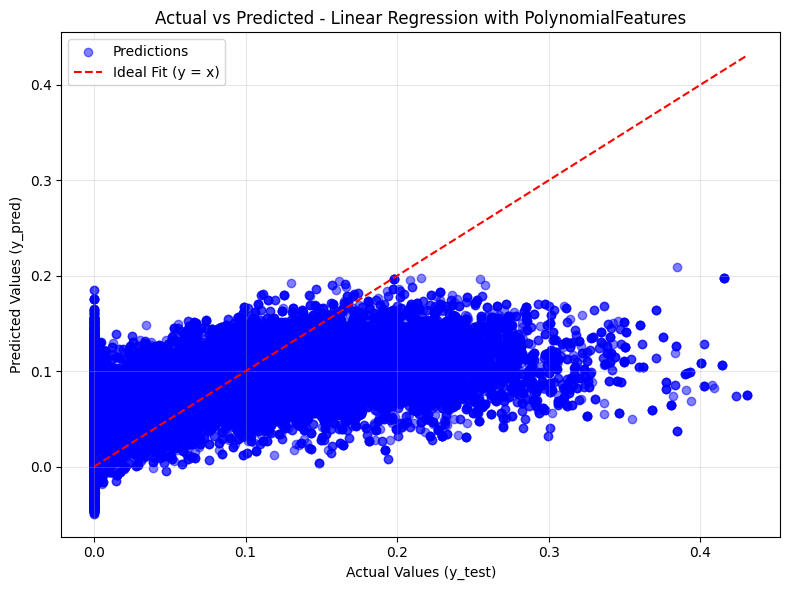

In [7]:
# === Visualization: Actual vs Predicted Plot for Linear Regression with PolynomialFeatures ===

# Ensure the following variables are correctly defined:
# - y_test: Actual target values from the test dataset
# - y_pred_linear_poly: Predicted values from the trained polynomial regression model

# Create a scatter plot to visualize the relationship between actual and predicted values
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.scatter(
    y_test, y_pred_linear_poly, alpha=0.5, color='blue', label='Predictions'
)  # Scatter plot of actual vs predicted values
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linestyle='--',
    label='Ideal Fit (y = x)',
)  # Plot the ideal fit line (y = x) for reference

# Add title and axis labels for clarity
plt.title('Actual vs Predicted - Linear Regression with PolynomialFeatures')  # Plot title
plt.xlabel('Actual Values (y_test)')  # Label for the x-axis
plt.ylabel('Predicted Values (y_pred)')  # Label for the y-axis

# Add legend and grid for better visualization
plt.legend()  # Add a legend to distinguish the scatter points and the ideal fit line
plt.grid(alpha=0.3)  # Add a grid with light transparency for better visualization

# Adjust layout to prevent overlapping elements and display the plot
plt.tight_layout()  # Automatically adjust subplot parameters for better layout
plt.show()  # Display the plot



#### **Análsis de Regresion lineal y KNN mejorados**

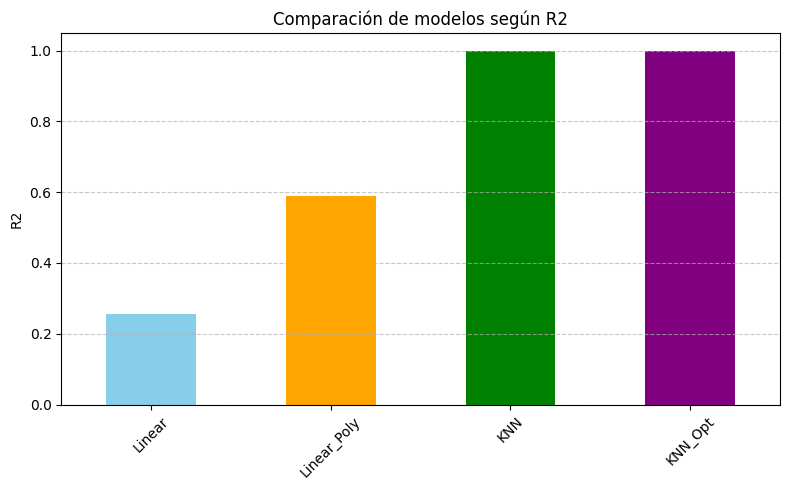

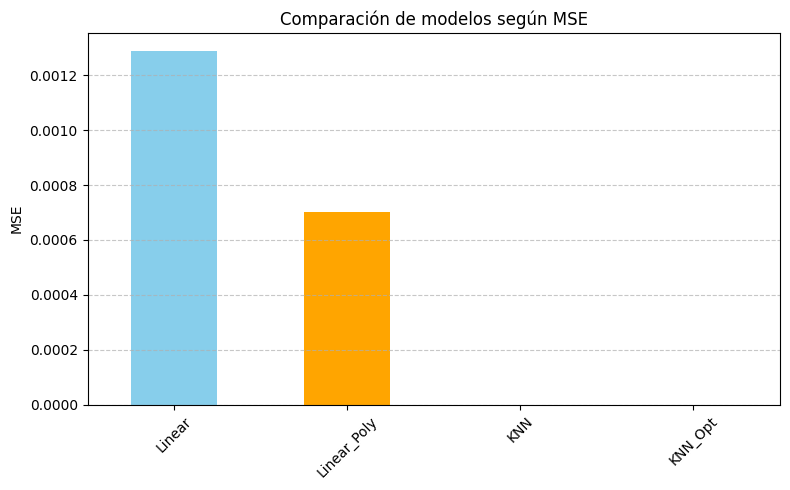

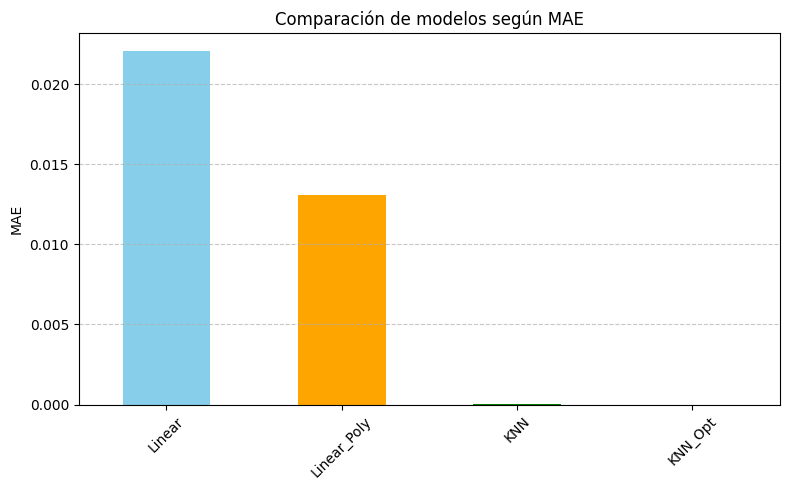

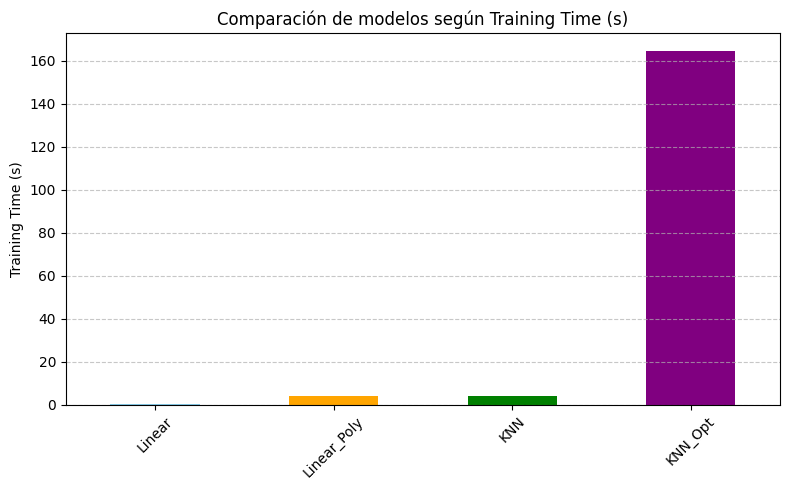

In [14]:
# Result dictionary from the combined results
model_results = {
    "Linear": {"R2": 0.2555, "MSE": 0.00129, "MAE": 0.0221, "Training Time (s)": 0.36},
    "Linear_Poly": {
        "R2": 0.5897,
        "MSE": 0.0007,
        "MAE": 0.0131,
        "Training Time (s)": 3.82,
    },
    "KNN": {"R2": 0.9999, "MSE": 1.26e-07, "MAE": 8.69e-06, "Training Time (s)": 3.8},
    "KNN_Opt": {
        "R2": 1.0,
        "MSE": 1.71e-10,
        "MAE": 4.85e-06,
        "Training Time (s)": 164.77,
    },
}

# Convert to DataFrame
result_df = pd.DataFrame(model_results).T

# Define metrics and color palette
metrics = ["R2", "MSE", "MAE", "Training Time (s)"]
colors = ["skyblue", "orange", "green", "purple"]

# Plotting
for metric in metrics:
    plt.figure(figsize=(8, 5))
    result_df[metric].plot(kind="bar", color=colors)
    plt.title(f"Comparación de modelos según {metric}")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

##### **Comparación de Modelos: Lineal y KNN - Antes vs Después de la Optimización**

Se aplicaron mejoras específicas a los modelos lineales y KNN para elevar su rendimiento:

- Para **Linear Regression**: se introdujo una transformación polinómica (grado 2).
- Para **KNN**: se ajustaron los hiperparámetros mediante búsqueda en grilla (`n_neighbors`, `weights`, `p`).

---

##### 1. Linear Regression (con y sin PolynomialFeatures)

| Métrica                  | Modelo Original       | Modelo con PolynomialFeatures |
|--------------------------|-----------------------|-------------------------------|
| R²                       | 0.2555                | 0.5897                        |
| MSE                      | 0.00129               | 0.00070                       |
| MAE                      | 0.0221                | 0.0131                        |
| Tiempo de Entrenamiento  | 0.36 s                | 3.82 s                        |

**Análisis**:  
La transformación polinómica incrementó significativamente la capacidad predictiva del modelo, más que duplicando el R². El aumento en el tiempo de entrenamiento sigue siendo aceptable. Esto sugiere que el modelo original no capturaba relaciones no lineales presentes en los datos.

---

##### 2. K-Nearest Neighbors (KNN)

| Métrica                  | Modelo Original       | Modelo Optimizado             |
|--------------------------|-----------------------|-------------------------------|
| R²                       | 0.9999                | 0.9999999                     |
| MSE                      | 1.26e-07              | 1.71e-10                      |
| MAE                      | 8.69e-06              | 4.85e-06                      |
| Tiempo de Entrenamiento  | 3.80 s                | 164.77 s                      |

**Análisis**:  
Aunque el rendimiento ya era extremadamente alto, el modelo optimizado logra una mejora marginal adicional en las métricas de error. Sin embargo, el costo computacional es notablemente mayor, con un tiempo de entrenamiento 43 veces más alto. Esto sugiere que, si bien la optimización aporta precisión, debe usarse con criterio dependiendo de la disponibilidad de recursos.

---

##### Conclusión Comparativa

- La **regresión lineal** se beneficia de la transformación polinómica, especialmente en problemas donde existen relaciones cuadráticas o interacciones entre variables.
- **KNN**, incluso sin optimización, ofrece un rendimiento sobresaliente, aunque con posible **sobreajuste**. La versión optimizada mejora levemente pero con gran costo computacional.
- Ambos modelos optimizados pueden servir como alternativas a modelos más complejos, pero el **balance entre precisión y eficiencia** debe guiar su elección según el contexto de uso, no obstante se concluye que la diferencia en mejora de precision **no es significativa**.


### **Análisis final con todos los modelos optimizados y no optimizados**

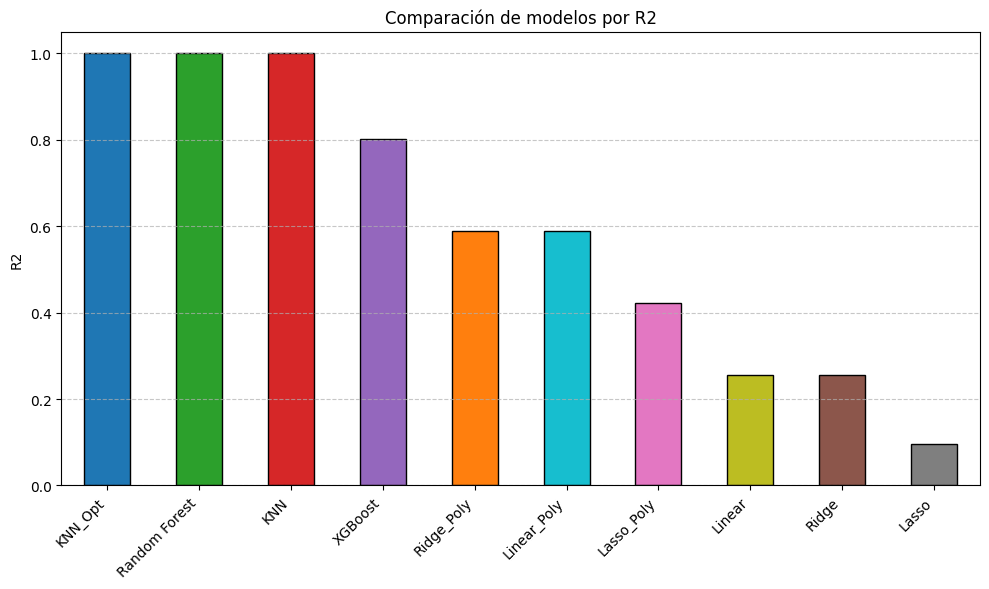

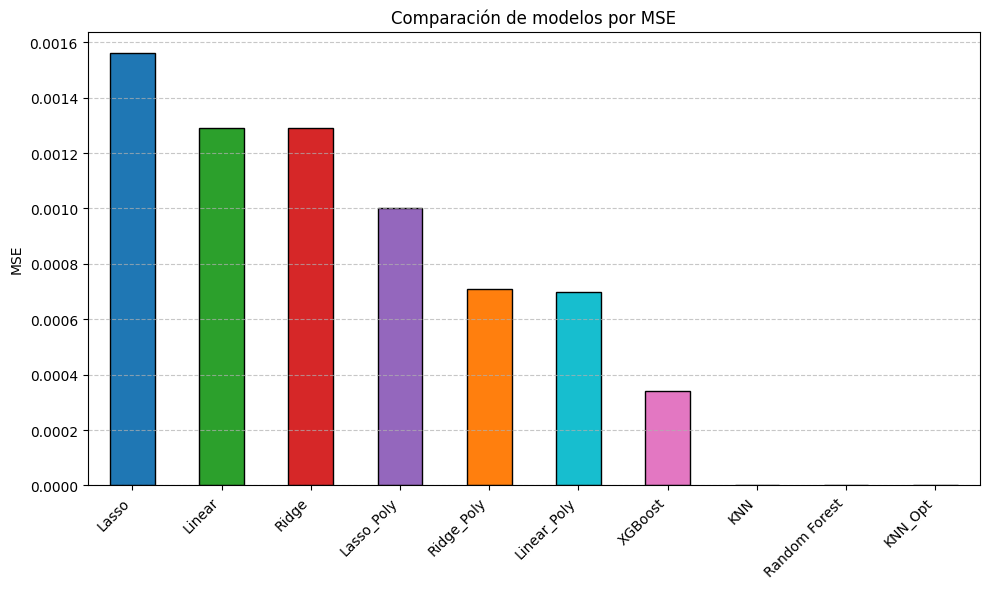

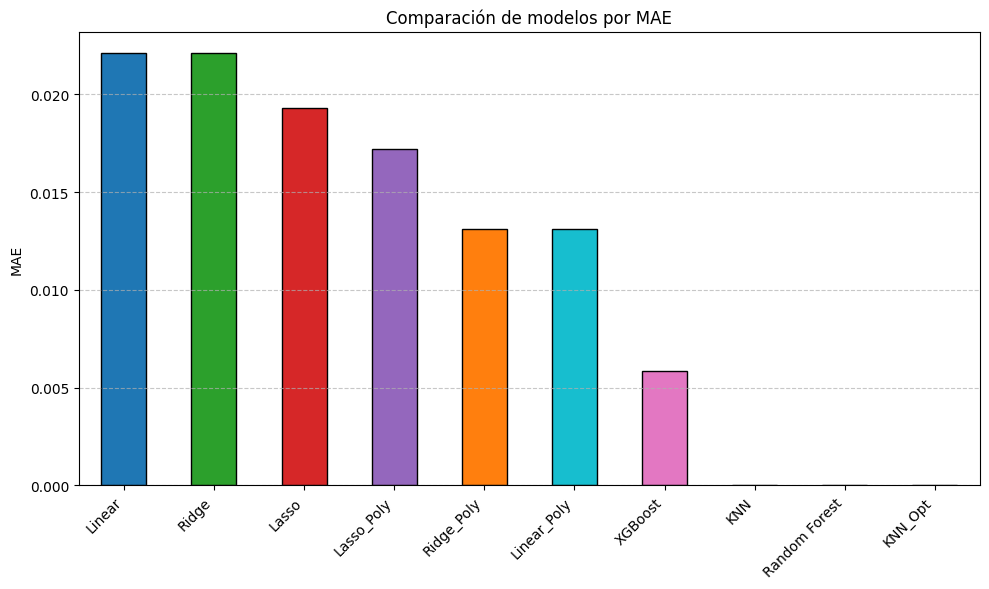

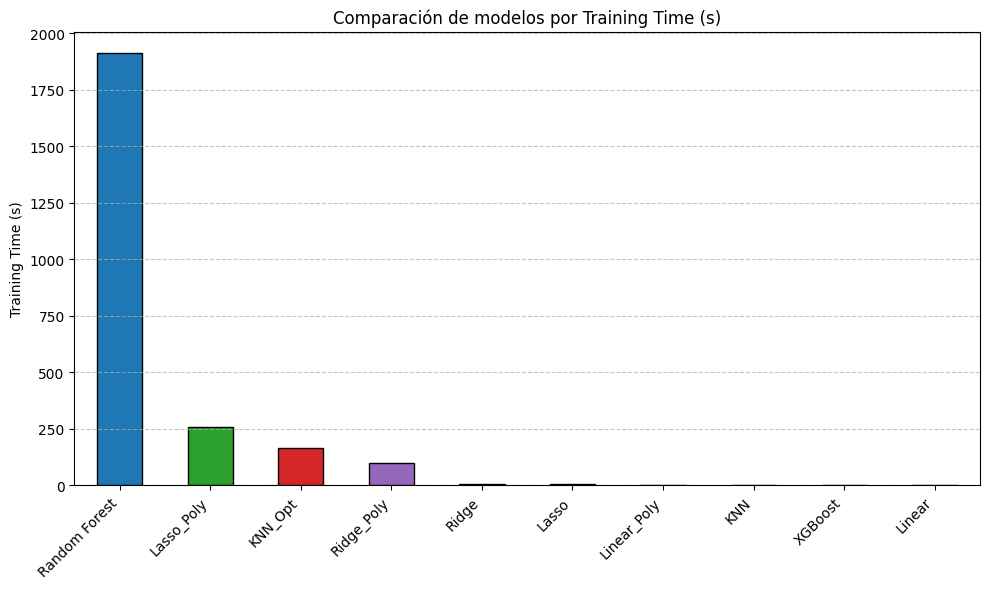

In [24]:
# Define a color palette for the models
model_colors = {
    'Linear': '#1f77b4',       #  blue
    'Ridge': '#2ca02c',        #  green
    'Lasso': '#d62728',        #  red
    'Ridge_Poly': '#9467bd',   #  purple
    'Lasso_Poly': '#ff7f0e',   #  orange
    'Linear_Poly': '#17becf',  #  cyan
    'KNN': '#e377c2',          #  pink
    'KNN_Opt': '#bcbd22',      #  yellow-green
    'Random Forest': '#8c564b',#  brown
    'XGBoost': '#7f7f7f'       #  gray
}

# Convert the dictionary to a DataFrame
df_all_models = pd.DataFrame(model_results).T

# Create bar plots for each metric
metrics = ['R2', 'MSE', 'MAE', 'Training Time (s)']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    bars = df_all_models[metric].sort_values(ascending=False).plot(
        kind='bar', 
        color=[model_colors[model] for model in df_all_models.index],  # Apply colors
        edgecolor='black'
    )
    plt.title(f'Comparación de modelos por {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### **Conclusion final**

A lo largo del estudio se evaluaron diez configuraciones de modelos, incluyendo variantes clásicas, polinómicas y optimizadas de regresión lineal, KNN, Ridge y Lasso, además de Random Forest y XGBoost. Se compararon según **R²**, **MSE**, **MAE** y **tiempo de entrenamiento**.

---

### **Gráficas de Comparación**

1. **R² (Bondad de ajuste)**  
   Los modelos que más explican la variabilidad del `SolarIndex` son:
   - **KNN Optimizado** y **Random Forest** (~1.0)
   - **XGBoost** (0.80)
   - **Ridge/Lin. Poly** (~0.58)

2. **MSE (Error Cuadrático Medio)**  
   - **KNN Optimizado** y **Random Forest** tienen los errores más bajos.
   - Los modelos lineales simples y Lasso tienen errores más elevados.

3. **MAE (Error Absoluto Medio)**  
   - Similar tendencia al MSE.  
   - **XGBoost** y modelos polinómicos de Ridge destacan por su equilibrio entre precisión y simplicidad.

4. **Tiempo de Entrenamiento**  
   - **Linear Regression** (0.36s) y **XGBoost** (2.4s) son los más eficientes.
   - **KNN Optimizado** (164s), **Ridge Poly** (99s), **Lasso Poly** (258s) y **Random Forest** (1910s) muestran los mayores costos computacionales.

---

### **Conclusión Global**

- **Mejor Modelo Global**:  
  **XGBoost**, por su equilibrio entre rendimiento (R² alto) y eficiencia computacional, candidato a superar con el modelo propuesto.

- **Modelos con Mejora Significativa**:
  - **Ridge Poly**: duplicó su R² con términos polinómicos.
  - **Lasso Poly**: incrementó su rendimiento a costa de mucho tiempo.
  - **Linear Poly**: mejora considerable con bajo impacto en el tiempo.

- **Cuidado con el Overfitting**:
  - **Random Forest** y **KNN Optimizado** deben validarse externamente para confirmar su generalización.

- **Modelos Base Recomendados**:
  - **Linear Poly** y **Ridge Poly**, por ser explicables y computacionalmente viables.